In [347]:
import pandas as pd
import numpy
from datetime import datetime
from selenium import webdriver

import matplotlib.pyplot as plt

In [348]:
driver = webdriver.Chrome('/Users/joel/selenium_drivers/chromedriver 3')

In [349]:
driver.get('https://docs.google.com/spreadsheets/d/18oVRrHj3c183mHmq3m89_163yuYltLNlOmPerQ18E8w/htmlview?sle=true#')

In [350]:
table = driver.find_element_by_tag_name('tbody')

rows = table.find_elements_by_tag_name('tr')

len(rows)

columns = rows[0].find_elements_by_tag_name('td')

rows = rows[2:]

In [364]:
with open('coronavirus.json') as f:
    data = json.load(f)
    state = data['state']
    current_date = rows[3].find_elements_by_tag_name('td')[0].text
    if current_date in state['Date']:
        df = pd.DataFrame(state)
        df = df[df.Date != current_date]
        
        state['Date'] = df.Date.tolist()
        state['State'] = df.State.tolist()
        state['Positive'] = df.Positive.tolist()
        state['Negative'] = df.Negative.tolist()
        state['Pending'] = df.Pending.tolist()
        state['Total'] = df.Total.tolist()
        
    for row in rows:
        cells = row.find_elements_by_tag_name('td')

        date = cells[0].text
        state_= cells[1].text
        positive = cells[2].text
        negative = cells[3].text
        pending = cells[4].text
        total = cells[5].text

        state['Date'].append(date)
        state['State'].append(state_)
        state['Positive'].append(positive)
        state['Negative'].append(negative)
        state['Pending'].append(pending)
        state['Total'].append(total)

with open('coronavirus.json', mode='w', encoding='utf-8') as f:
    json.dump(data, f)

In [365]:
with open('coronavirus.json') as f:
    data = json.load(f)
    state = data['state']

In [366]:
import pandas as pd

In [367]:
df = pd.DataFrame(state)

In [368]:
df.Date = pd.to_datetime(df.Date)

df.set_index('Date', drop=True, inplace = True)

df = df.replace('', np.nan)

columns = df.columns

columns = columns.drop('State')

for column in columns:
    df[column] = df[column].astype(float)

grouped = df.groupby(pd.Grouper(freq='D')).sum()

collected = []
for idx in grouped.index:
    day = df[df.index == grouped.index[0]]
    count = len(day[day.Positive > 0])
    collected.append(count)

collected

grouped['state_count'] = collected


In [379]:
data['daily_summary']['Date'] = ['{}/{}/{}'.format(x.month,x.day, x.year) for x in grouped.index]
data['daily_summary']['Positive'] = grouped.Positive.tolist()
data['daily_summary']['Negative'] = grouped.Negative.tolist()
data['daily_summary']['Pending'] = grouped.Pending.tolist()
data['daily_summary']['Total'] = grouped.Total.tolist()
data['daily_summary']['Confirmed States'] = grouped.state_count.tolist()

with open('coronavirus.json', mode='w', encoding='utf-8') as f:
    json.dump(data, f)

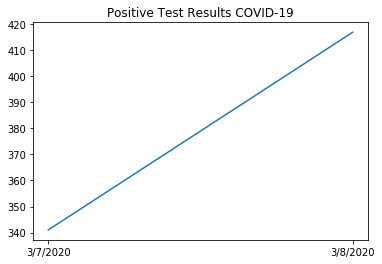

In [382]:
with open('coronavirus.json') as f:
    plotting = json.load(f)

plotting = pd.DataFrame(plotting['daily_summary'])

plotting.set_index('Date', drop = True, inplace = True)

xaxis = plotting.index

plt.plot(xaxis, plotting.Positive.values, label = 'Positive')
plt.title('Positive Test Results COVID-19');
